In [14]:
from util import *
import  numpy as np
import matplotlib.pyplot as plt
import tifffile


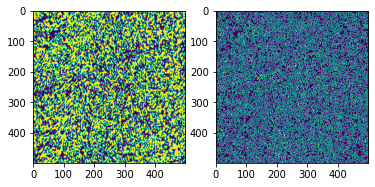

In [15]:
#Load and view an image. Note should be 2-phase and x by y, with no colour channel
p = 'microstructure006'
img = plt.imread(f'D:/Dataset/{p}/{p}_inpainted.png')[...,0]
fig, axs = plt.subplots(1,2)
sa_img = make_sa(img, batch=False)
axs[0].imshow(img)
axs[1].imshow(sa_img, vmax=1)


In [16]:

# Default is to predict the 95% confidence limit for 5% error

vf_preds = make_error_prediction(img)
# sa_preds = make_error_prediction(sa_img, met='sa')
print(f'VF error for input img: {vf_preds[0]}')
print(f'Image edge length for 95% conf VF is within 5%: {vf_preds[1]}')
# print(f'SA error for input img: {sa_preds[0]}')
# print(f'Image edge length for 95% conf SA is within 5%: {sa_preds[1]}')



VF error for input img: 0.05393590053860837
Image edge length for 95% conf VF is within 5%: 544.2255510870307


In [18]:
# lets check those numbers agree
vf_preds = make_error_prediction(img, err_targ=0.05393590053860837, shape=[200])
print(f'Image edge length for 95% conf VF is within 0.02823: {vf_preds[1]}, true image shape: {img.shape}')


Image edge length for 95% conf VF is within 0.02823: 1239.0243902439045, true image shape: (500, 500)


In [12]:
vf_preds = make_error_prediction(img, model_error=False)
sa_preds = make_error_prediction(sa_img, model_error=False, met='sa')
print(f'VF error for input img: {vf_preds[0]}')
print(f'Image edge length for 95% conf VF is within 5%: {vf_preds[1]}')
print(f'SA error for input img: {sa_preds[0]}')
print(f'Image edge length for 95% conf SA is within 5%: {sa_preds[1]}')

VF error for input img: 0.0260979735969402
Image edge length for 95% conf VF is within 5%: 245.3095812576144
SA error for input img: 0.01281433677051353
Image edge length for 95% conf SA is within 5%: 58.322268330036806


In [7]:
# Can specify stricter confidence limits
vf_preds = make_error_prediction(img, conf=0.99)
print(f'Image edge length for 99% conf VF is within 5%: {vf_preds[1]}')

# Can specify stricter error requirements
vf_preds = make_error_prediction(img, err_targ=0.01, conf=0.99)
print(f'Image edge length for 99% conf VF is within 1%: {vf_preds[1]}')



Image edge length for 99% conf VF is within 5%: 783.3376392744661
Image edge length for 99% conf VF is within 1%: 7748.943294394305


In [8]:

# Default is to predict the 95% confidence limit for 5% error
vf_preds = make_error_prediction(img, model_error=False)
sa_preds = make_error_prediction(sa_img, model_error=False)

print(f'VF error for input img: {vf_preds[0]}')
print(f'Image edge length for 95% conf VF is within 5%: {vf_preds[1]}')
print(f'SA error for input img: {sa_preds[0]}')
print(f'Image edge length for 95% conf SA is within 5%: {sa_preds[1]}')



VF error for input img: 0.0260979735969402
Image edge length for 95% conf VF is within 5%: 245.3095812576144
SA error for input img: 0.009023211064903235
Image edge length for 95% conf SA is within 5%: 67.69084304761041


In [9]:
# First, the case where a user has an image and wants to know error for a given confidence
# Image of size 1000 x 1000, vf is 0.5, user defines confidence limit 90%
# Model says (90^0.5)% confident within 1% of the true value i.e 0.5 +- 0.005
# Model error: (90^0.5)% confident error is less than 50%
# This is always the best split of confidences due to the behaviour of z values ->
# err_bern = s*(z1* std_bern)/vf + i = 0.2
# err_model = z2 * std_model * 0.5 = 0.5
# total err = err_bern + err_bern*err_model = err_bern * (1 + err_model)
# total_err = (z1* std_bern)/vf * (1 + z2 * std_model * 0.5)
# Overall confidence 90% that error is within 0.5 +- 0.15

# Next, the case where a user wants to know what size image they need for a given confidence
#  e.g how many n to be 90% confident within 1% of true value -> 0.01
# 
# Extract TPC then fac
# err_bern = (z1/vf * ((1/nf)vf(1-vf))^0.5)*s+i
# err_model = z2 * std_model * 0.5
# err_total = err_bern * (1 + err_model)
# err_bern = err_total/(1 + err_model)
# (z1/vf * ((1/nf)vf(1-vf))^0.5)*s+i = err_total/(1 + err_model)
# (z1/vf * ((1/nf)vf(1-vf))^0.5) = (err_total/(1 + err_model) - i)/s
# ((1/nf)vf(1-vf)) = (vf*(err_total/(1 + err_model) - i)/(s*z1))^2
# 1/nf =  (vf*(err_total/(1 + err_model) - i))^2/((s*z1)^2 * vf(1-vf))
# nf = ((vf*1-vf)*(s*z1)^2)/(vf*(err_total/(1 + err_model) - i))^2



# ((1/nf)vf(1-vf))^0.5 =((err_total *(1 + err_model))-i)* vf/ (z1*s)
# 1/nf = (err_total * vf/ z1*(1 + err_model))^2/(vf(1-vf))
# 1/nf = (vf * err_total/(z1 * (1 + err_model)))^2/vf(1-vf)
# nf = vf(1-vf)(z1*(1 + err_model))^2/(vf * err_total)^2
# nf = vf(1-vf)(z1*(1 + z2 * std_model * 0.5))^2/(vf * err_total)^2
# They say 90%, we say P = 1/2(1+erf(z/2^0.5))





Todo
Questions:

Do we turn all errors into decimals???

Code:
Comment -> Amir help once done
Clean -> Amir help once done
Add to taufactor (later/never)
Run again to check all functions work?
Turn figures into notebook with comments
DONE Fix fig4.py 

Paper:
Refs

Maths?
Stat

Fig 1:
axis labels
caption describe fac


Fig 2:
Add mag
change raw and fitted legend
make all tpc go all the way
remove ticks
axis labels

Fig3:
Legend
Add lines for 95% conf

fig 4
add 95% conf
Caption

Fig 5
Workflow for an image

In [10]:
stats.norm.interval(0.95, scale=2)

(-3.919927969080108, 3.919927969080108)